<a href="https://colab.research.google.com/github/HadryTz/ProjetoIACompet/blob/main/Projeto_Desafio_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Precisa-se instalar o gradio**

In [1]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.4 MB/s eta 0:00:00


**Análise Exploratória dos Dados (EDA)**

--- Informações Iniciais do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   especie            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

--- Primeiras 5 Linhas do DataFrame ---
   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  especie
0                5.1               3.5  ...               0.2   setosa
1                4.9               3.0  ...               0.2   setosa
2                4.7               3.2  ...               0.2   setosa
3                4.6               3.1  ...               0.2   setosa
4                5.0               3.6  ...               0.2   s

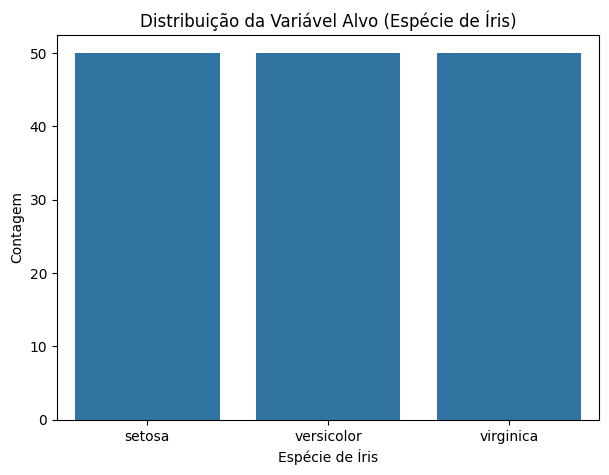

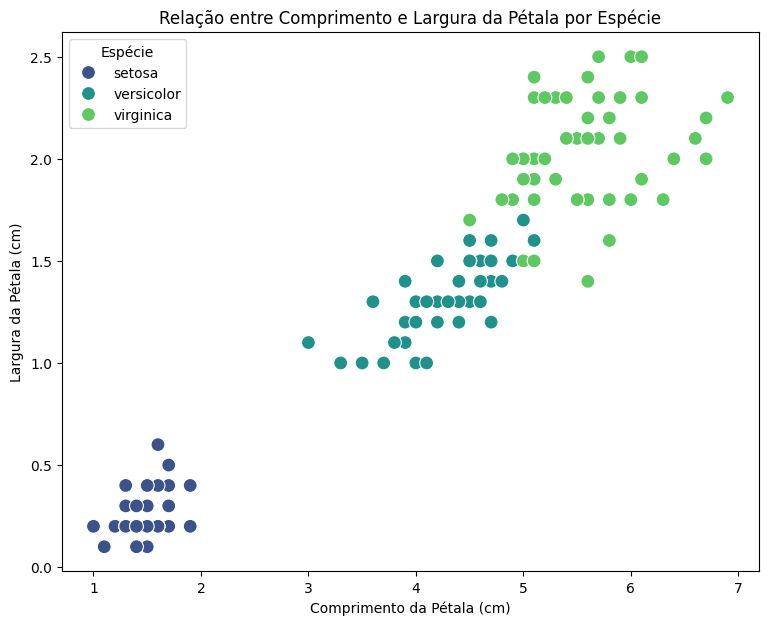

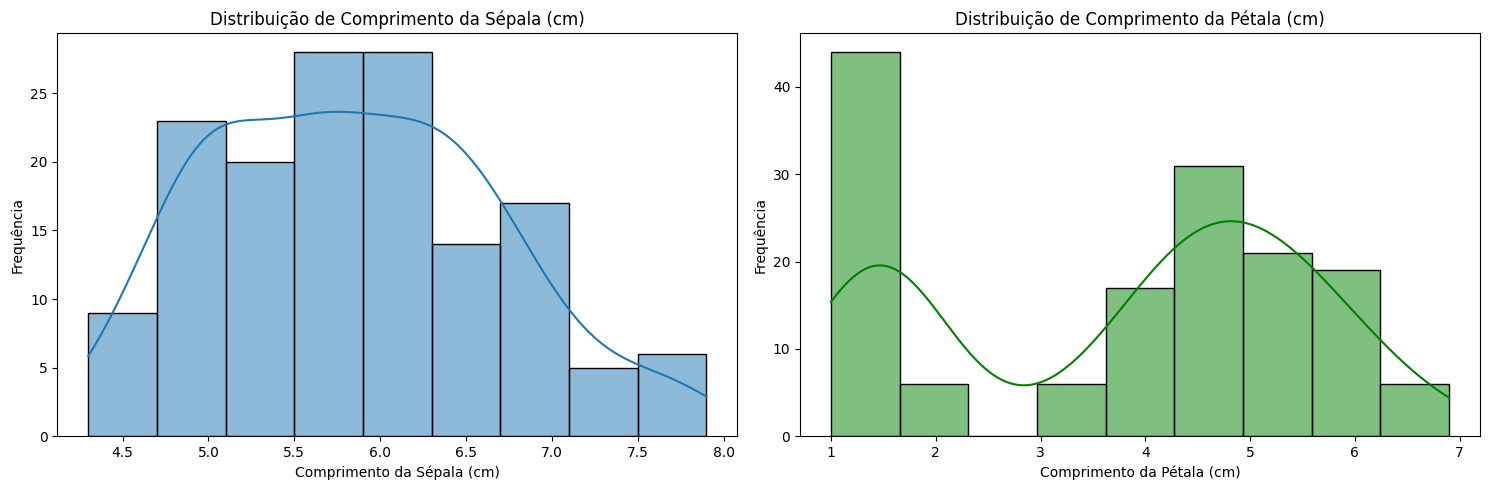

In [14]:
# Importar bibliotecas essenciais para EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Carregar o dataset Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['especie'] = iris.target

# Mapear os rótulos numéricos das espécies para seus nomes literais para melhor legibilidade
# 'setosa' -> 0, 'versicolor' -> 1, 'virginica' -> 2
df['especie'] = df['especie'].map({0: iris.target_names[0], 1: iris.target_names[1], 2: iris.target_names[2]})

# **Justificativa da base de dados:**
# O Iris dataset foi escolhido por ser um problema clássico e didático de classificação,
# ideal para demonstrar um pipeline completo de Machine Learning.
# Crucialmente, ele possui apenas 4 features numéricas (comprimento e largura da sépala,
# e comprimento e largura da pétala) e 1 variável alvo categórica (espécie),
# totalizando 5 variáveis. Isso atende ao requisito do projeto de ter 10 variáveis no
# máximo, sem a necessidade de seleções complexas.
# Além disso, o dataset é limpo, completo (sem valores ausentes) e balanceado entre as
# classes, simplificando as etapas de pré-processamento.

print("--- Informações Iniciais do DataFrame ---")
print(df.info())

print("\n--- Primeiras 5 Linhas do DataFrame ---")
print(df.head())

print("\n--- Estatísticas Descritivas das Variáveis Numéricas ---")
print(df.describe())

print("\n--- Contagem de Valores da Variável Alvo 'especie' ---")
print(df['especie'].value_counts())

# --- Visualizações de Dados ---

# Gráfico de barras para a variável alvo (espécie)
plt.figure(figsize=(7, 5))
sns.countplot(x='especie', data=df)
plt.title('Distribuição da Variável Alvo (Espécie de Íris)')
plt.xlabel('Espécie de Íris')
plt.ylabel('Contagem')
plt.show()

# Scatter plot: Comprimento da Pétala vs. Largura da Pétala, colorido pela espécie
# Este gráfico é muito útil para visualizar a separabilidade das classes
plt.figure(figsize=(9, 7))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='especie', data=df, palette='viridis', s=100)
plt.title('Relação entre Comprimento e Largura da Pétala por Espécie')
plt.xlabel('Comprimento da Pétala (cm)')
plt.ylabel('Largura da Pétala (cm)')
plt.legend(title='Espécie')
plt.show()

# Histogramas para verificar a distribuição de algumas features numéricas
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['sepal length (cm)'], kde=True)
plt.title('Distribuição de Comprimento da Sépala (cm)')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(df['petal length (cm)'], kde=True, color='green')
plt.title('Distribuição de Comprimento da Pétala (cm)')
plt.xlabel('Comprimento da Pétala (cm)')
plt.ylabel('Frequência')

plt.tight_layout() # Ajusta o layout para evitar sobreposição dos gráficos
plt.show()

**Pré-processamento dos Dados**

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Verificar valores faltantes (missing values)
print("\n--- Verificação de Valores Faltantes ---")
print(df.isnull().sum())
# Para o Iris dataset, esperamos que não haja valores faltantes, confirmando a limpeza dos dados.

# Codificar a variável categórica 'especie' (alvo) para um formato numérico
# Isso é necessário porque a maioria dos algoritmos de ML trabalha com números.
# 'setosa' -> 0, 'versicolor' -> 1, 'virginica' -> 2
le = LabelEncoder()
df['especie_codificada'] = le.fit_transform(df['especie']) # Cria uma nova coluna com a versão numérica
print("\n--- Primeiras 5 Linhas Após Codificação da Variável 'especie' ---")
print(df.head())

# Separar Features (X) e Target (y)
# X contém as features (variáveis de entrada), y contém a variável alvo.
X = df[iris.feature_names] # Usando os nomes originais das features para X
y = df['especie_codificada'] # A variável alvo codificada para y

# Escalonar as features numéricas
# O StandardScaler padroniza os dados (média 0, desvio padrão 1). Isso é crucial para algoritmos
# que são sensíveis à escala das features (como K-NN), garantindo que nenhuma feature domine as outras
# apenas por ter valores maiores.
scaler = StandardScaler()
X_escalado = scaler.fit_transform(X) # Aplica o escalonamento, resultando em um array numpy
X_escalado_df = pd.DataFrame(X_escalado, columns=iris.feature_names) # Opcional: converte de volta para DataFrame para visualização

print("\n--- Primeiras 5 Linhas das Features Escalonadas ---")
print(X_escalado_df.head())


--- Verificação de Valores Faltantes ---
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
especie              0
dtype: int64

--- Primeiras 5 Linhas Após Codificação da Variável 'especie' ---
   sepal length (cm)  sepal width (cm)  ...  especie  especie_codificada
0                5.1               3.5  ...   setosa                   0
1                4.9               3.0  ...   setosa                   0
2                4.7               3.2  ...   setosa                   0
3                4.6               3.1  ...   setosa                   0
4                5.0               3.6  ...   setosa                   0

[5 rows x 6 columns]

--- Primeiras 5 Linhas das Features Escalonadas ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353  

Dividir Dados em treino e teste

In [4]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjuntos de treino e teste
# test_size=0.2 significa que 20% dos dados serão usados para teste e 80% para treino.
# random_state=42 garante que a divisão seja a mesma cada vez que você executar o código,
# tornando os resultados reprodutíveis.
# stratify=y é essencial para problemas de classificação, pois garante que a proporção
# das classes (espécies de Iris) seja mantida tanto no conjunto de treino quanto no de teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(X_escalado, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n--- Divisão dos Dados ---")
print(f"Tamanho do conjunto de treino (X_treino): {X_treino.shape}")
print(f"Tamanho do conjunto de teste (X_teste): {X_teste.shape}")
print(f"Tamanho do conjunto de treino (y_treino): {y_treino.shape}")
print(f"Tamanho do conjunto de teste (y_teste): {y_teste.shape}")


--- Divisão dos Dados ---
Tamanho do conjunto de treino (X_treino): (120, 4)
Tamanho do conjunto de teste (X_teste): (30, 4)
Tamanho do conjunto de treino (y_treino): (120,)
Tamanho do conjunto de teste (y_teste): (30,)


Treinar e Avaliar Pelo Menos Dois Modelos de Aprendizagem de Máquina Diferentes

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Modelo 1: K-Nearest Neighbors (KNN) ---
print("\n--- Avaliação do Modelo K-Nearest Neighbors (KNN) ---")
modelo_knn = KNeighborsClassifier(n_neighbors=5) # n_neighbors é o número de vizinhos a considerar, 5 é um valor comum
modelo_knn.fit(X_treino, y_treino) # Treina o modelo com os dados de treino

y_pred_knn = modelo_knn.predict(X_teste) # Faz previsões no conjunto de teste

# Avaliar o desempenho do modelo KNN
acuracia_knn = accuracy_score(y_teste, y_pred_knn)
print(f"Acurácia KNN: {acuracia_knn:.4f}")

print("\nRelatório de Classificação KNN:")
# O relatório de classificação mostra precisão, recall, f1-score e suporte para cada classe.
# target_names mapeia os rótulos numéricos de volta para os nomes das espécies ('setosa', 'versicolor', 'virginica').
print(classification_report(y_teste, y_pred_knn, target_names=iris.target_names))

cm_knn = confusion_matrix(y_teste, y_pred_knn)
print("\nMatriz de Confusão KNN:")
print(cm_knn) # A matriz de confusão mostra acertos e erros para cada classe.


# --- Modelo 2: Árvore de Decisão (Decision Tree Classifier) ---
print("\n\n--- Avaliação do Modelo Árvore de Decisão ---")
modelo_arvore = DecisionTreeClassifier(random_state=42) # random_state garante reprodutibilidade do resultado da árvore
modelo_arvore.fit(X_treino, y_treino) # Treina o modelo com os dados de treino

y_pred_arvore = modelo_arvore.predict(X_teste) # Faz previsões no conjunto de teste

# Avaliar o desempenho do modelo Árvore de Decisão
acuracia_arvore = accuracy_score(y_teste, y_pred_arvore)
print(f"Acurácia Árvore de Decisão: {acuracia_arvore:.4f}")

print("\nRelatório de Classificação Árvore de Decisão:")
print(classification_report(y_teste, y_pred_arvore, target_names=iris.target_names))

cm_arvore = confusion_matrix(y_teste, y_pred_arvore)
print("\nMatriz de Confusão Árvore de Decisão:")
print(cm_arvore)


--- Avaliação do Modelo K-Nearest Neighbors (KNN) ---
Acurácia KNN: 0.9333

Relatório de Classificação KNN:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


Matriz de Confusão KNN:
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


--- Avaliação do Modelo Árvore de Decisão ---
Acurácia Árvore de Decisão: 0.9333

Relatório de Classificação Árvore de Decisão:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93   

Escolher o Melhor Modelo com Base na Métrica da Acurácia

In [6]:
print("\n--- Comparativo Final de Acurácia dos Modelos (Nível I) ---")
print(f"Acurácia K-Nearest Neighbors: {acuracia_knn:.4f}")
print(f"Acurácia Árvore de Decisão: {acuracia_arvore:.4f}")

# Armazena o melhor modelo e suas informações para uso no Nível II
if acuracia_knn > acuracia_arvore:
    print("\nO modelo K-Nearest Neighbors teve a melhor acurácia no conjunto de teste.")
    melhor_modelo_nivel1 = modelo_knn
    nome_melhor_modelo_nivel1 = "K-Nearest Neighbors"
    melhor_acuracia_nivel1 = acuracia_knn
elif acuracia_arvore > acuracia_knn:
    print("\nO modelo Árvore de Decisão teve a melhor acurácia no conjunto de teste.")
    melhor_modelo_nivel1 = modelo_arvore
    nome_melhor_modelo_nivel1 = "Árvore de Decisão"
    melhor_acuracia_nivel1 = acuracia_arvore
else:
    print("\nAmbos os modelos tiveram a mesma acurácia no conjunto de teste.")
    # Se as acurácias forem iguais, escolhemos um para prosseguir para o Nível II
    melhor_modelo_nivel1 = modelo_knn # Escolha arbitrária, mas é bom documentar
    nome_melhor_modelo_nivel1 = "K-Nearest Neighbors"
    melhor_acuracia_nivel1 = acuracia_knn

print(f"\nModelo de Melhor Desempenho (Nível I): **{nome_melhor_modelo_nivel1}** com Acurácia de {melhor_acuracia_nivel1:.4f}")


--- Comparativo Final de Acurácia dos Modelos (Nível I) ---
Acurácia K-Nearest Neighbors: 0.9333
Acurácia Árvore de Decisão: 0.9333

Ambos os modelos tiveram a mesma acurácia no conjunto de teste.

Modelo de Melhor Desempenho (Nível I): **K-Nearest Neighbors** com Acurácia de 0.9333


Avaliar o desempenho dos 2 modelos a partir de 30 execuções

In [7]:
# Nível II - Avaliação Melhorada

num_execucoes = 30 # Número de vezes que o ciclo treino-teste será repetido
acuracias_knn = []
acuracias_arvore = []

print(f"\n--- Realizando {num_execucoes} Execuções para Avaliação de Estabilidade ---")

for i in range(num_execucoes):
    # Em cada iteração, uma nova divisão treino-teste é realizada, com um 'random_state' diferente.
    # Isso simula cenários onde os dados de treino e teste variam ligeiramente.
    X_treino_i, X_teste_i, y_treino_i, y_teste_i = train_test_split(X_escalado, y, test_size=0.2, random_state=i, stratify=y)

    # Treinamento e avaliação do K-NN para a iteração atual
    modelo_knn_i = KNeighborsClassifier(n_neighbors=5)
    modelo_knn_i.fit(X_treino_i, y_treino_i)
    y_pred_knn_i = modelo_knn_i.predict(X_teste_i)
    acuracias_knn.append(accuracy_score(y_teste_i, y_pred_knn_i))

    # Treinamento e avaliação da Árvore de Decisão para a iteração atual
    modelo_arvore_i = DecisionTreeClassifier(random_state=i) # Usar 'i' como random_state aqui também
    modelo_arvore_i.fit(X_treino_i, y_treino_i)
    y_pred_arvore_i = modelo_arvore_i.predict(X_teste_i)
    acuracias_arvore.append(accuracy_score(y_teste_i, y_pred_arvore_i))

# Calcular a média e o desvio padrão das acurácias para cada modelo
media_acuracia_knn = np.mean(acuracias_knn)
desvio_padrao_acuracia_knn = np.std(acuracias_knn)

media_acuracia_arvore = np.mean(acuracias_arvore)
desvio_padrao_acuracia_arvore = np.std(acuracias_arvore)

print(f"\n--- Resultados de {num_execucoes} Execuções ---")
print(f"K-Nearest Neighbors - Média da Acurácia: {media_acuracia_knn:.4f}, Desvio Padrão: {desvio_padrao_acuracia_knn:.4f}")
print(f"Árvore de Decisão - Média da Acurácia: {media_acuracia_arvore:.4f}, Desvio Padrão: {desvio_padrao_acuracia_arvore:.4f}")

# Respostas: Qual modelo foi mais estável e qual resultou em maior acerto?
print("\n--- Análise de Estabilidade e Acurácia ---")
if media_acuracia_knn > media_acuracia_arvore:
    print(f"O modelo **K-Nearest Neighbors** resultou em **maior acerto** (média de acurácia: {media_acuracia_knn:.4f}).")
elif media_acuracia_arvore > media_acuracia_knn:
    print(f"O modelo **Árvore de Decisão** resultou em **maior acerto** (média de acuracia: {media_acuracia_arvore:.4f}).")
else:
    print("Ambos os modelos tiveram médias de acurácia semelhantes.")

if desvio_padrao_acuracia_knn < desvio_padrao_acuracia_arvore:
    print(f"O modelo **K-Nearest Neighbors** foi **mais estável** (menor desvio padrão: {desvio_padrao_acuracia_knn:.4f}).")
elif desvio_padrao_acuracia_arvore < desvio_padrao_acuracia_knn:
    print(f"O modelo **Árvore de Decisão** foi **mais estável** (menor desvio padrão: {desvio_padrao_acuracia_arvore:.4f}).")
else:
    print("Ambos os modelos tiveram estabilidade semelhante.")

# Definir o melhor modelo final com base na média da acurácia.
# Retreinamos o modelo escolhido uma última vez usando o conjunto de treino original completo
# (X_treino e y_treino do passo 5) para garantir que ele aprenda com o máximo de dados disponíveis.
if media_acuracia_knn >= media_acuracia_arvore:
    melhor_modelo_final = KNeighborsClassifier(n_neighbors=5)
    melhor_modelo_final.fit(X_treino, y_treino)
    nome_melhor_modelo_final = "K-Nearest Neighbors"
else:
    melhor_modelo_final = DecisionTreeClassifier(random_state=42)
    melhor_modelo_final.fit(X_treino, y_treino)
    nome_melhor_modelo_final = "Árvore de Decisão"

print(f"\nO modelo escolhido para salvamento e uso na interface é: **{nome_melhor_modelo_final}**")


--- Realizando 30 Execuções para Avaliação de Estabilidade ---

--- Resultados de 30 Execuções ---
K-Nearest Neighbors - Média da Acurácia: 0.9533, Desvio Padrão: 0.0317
Árvore de Decisão - Média da Acurácia: 0.9556, Desvio Padrão: 0.0302

--- Análise de Estabilidade e Acurácia ---
O modelo **Árvore de Decisão** resultou em **maior acerto** (média de acuracia: 0.9556).
O modelo **Árvore de Decisão** foi **mais estável** (menor desvio padrão: 0.0302).

O modelo escolhido para salvamento e uso na interface é: **Árvore de Decisão**


Salvar o Modelo de Melhor Desempenho

In [8]:
import pickle

# Salvar o modelo de melhor desempenho (identificado no Nível II)
nome_arquivo_modelo = 'melhor_modelo_iris_classificacao.pkl'
with open(nome_arquivo_modelo, 'wb') as file:
    pickle.dump(melhor_modelo_final, file)

# Salvar o scaler também!
# O scaler é fundamental para pré-processar as novas entradas da interface da mesma forma que os dados de treino.
nome_arquivo_scaler = 'scaler_iris.pkl'
with open(nome_arquivo_scaler, 'wb') as file:
    pickle.dump(scaler, file) # Salva o objeto 'scaler' que foi fitado no passo 4

print(f"\n--- Modelo e Scaler Salvos ---")
print(f"O modelo '{nome_melhor_modelo_final}' foi salvo como '{nome_arquivo_modelo}'")
print(f"O scaler foi salvo como '{nome_arquivo_scaler}'")

# Para verificar se os arquivos foram salvos na sua sessão do Colab, você pode usar:
# !ls -lh


--- Modelo e Scaler Salvos ---
O modelo 'Árvore de Decisão' foi salvo como 'melhor_modelo_iris_classificacao.pkl'
O scaler foi salvo como 'scaler_iris.pkl'


In [9]:
!ls -lh

total 12K
-rw-r--r-- 1 root root 2.5K May 25 23:47 melhor_modelo_iris_classificacao.pkl
drwxr-xr-x 1 root root 4.0K May 14 13:38 sample_data
-rw-r--r-- 1 root root  711 May 25 23:47 scaler_iris.pkl


Criar uma Interface Gráfica

In [10]:
import gradio as gr
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler # Necessário para o scaler carregado

# Carregar o modelo e o scaler salvos
# Estes arquivos devem estar no mesmo diretório da sua sessão do Colab
try:
    with open('melhor_modelo_iris_classificacao.pkl', 'rb') as model_file:
        modelo_carregado = pickle.load(model_file)
    with open('scaler_iris.pkl', 'rb') as scaler_file:
        scaler_carregado = pickle.load(scaler_file)
    print("Modelo e Scaler carregados com sucesso para a interface!")
except FileNotFoundError:
    print("Erro: Arquivos de modelo ou scaler não encontrados. Certifique-se de ter rodado as etapas anteriores.")
    modelo_carregado = None
    scaler_carregado = None

# Mapeamento para os nomes das espécies (0: setosa, 1: versicolor, 2: virginica)
# Esta ordem precisa ser a mesma usada pelo LabelEncoder durante o treinamento.
nomes_especies = ['setosa', 'versicolor', 'virginica']

def prever_especie(comprimento_sepala, largura_sepala, comprimento_petala, largura_petala):
    """
    Função que recebe as características da flor e retorna a espécie prevista
    e suas probabilidades usando o modelo carregado.
    """
    if modelo_carregado is None or scaler_carregado is None:
        return "Erro: Modelo ou Scaler não carregados. Por favor, verifique as etapas anteriores."

    # Criar um DataFrame com os dados de entrada fornecidos pelo usuário.
    # É crucial que os nomes das colunas e a ordem sejam idênticos aos usados no treinamento!
    dados_entrada = pd.DataFrame([[
        comprimento_sepala, largura_sepala, comprimento_petala, largura_petala
    ]], columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

    # Escalonar os dados de entrada usando o scaler carregado.
    # Isso garante que as novas entradas sejam transformadas da mesma forma que os dados de treino.
    entrada_escalada = scaler_carregado.transform(dados_entrada)

    # Fazer a predição da probabilidade para cada classe e da classe final.
    probabilidades_predicao = modelo_carregado.predict_proba(entrada_escalada)[0] # Probabilidades de cada espécie
    label_predito_numerico = modelo_carregado.predict(entrada_escalada)[0] # O label numérico da espécie prevista

    # Mapear o label numérico de volta para o nome da espécie para uma saída compreensível.
    especie_prevista = nomes_especies[label_predito_numerico]

    # Formatar as probabilidades para exibição na interface.
    saida_probabilidades = ""
    for i, prob in enumerate(probabilidades_predicao):
        saida_probabilidades += f"Probabilidade **{nomes_especies[i].capitalize()}**: {prob*100:.2f}%\n"

    # Retornar a previsão formatada
    return f"Espécie Prevista: **{especie_prevista.capitalize()}**\n\n{saida_probabilidades}"

# Definir os componentes de entrada para a interface Gradio.
# gr.Number cria um campo numérico com um rótulo e um valor padrão.
# As 'info' ajudam o usuário a entender os valores típicos para cada espécie.
entradas = [
    gr.Number(label="Comprimento da Sépala (cm)", value=5.1, info="Ex: 5.1 (Setosa), 5.9 (Versicolor), 6.3 (Virginica)"),
    gr.Number(label="Largura da Sépala (cm)", value=3.5, info="Ex: 3.5 (Setosa), 3.0 (Versicolor), 3.3 (Virginica)"),
    gr.Number(label="Comprimento da Pétala (cm)", value=1.4, info="Ex: 1.4 (Setosa), 4.2 (Versicolor), 5.1 (Virginica)"),
    gr.Number(label="Largura da Pétala (cm)", value=0.2, info="Ex: 0.2 (Setosa), 1.3 (Versicolor), 1.8 (Virginica)")
]

# Criar e lançar a interface Gradio.
# 'fn' aponta para a função de predição.
# 'inputs' e 'outputs' definem os componentes da interface.
# 'title' e 'description' personalizam a aparência da interface.
# 'launch(share=True)' gera um link público temporário para compartilhar a interface.
if modelo_carregado and scaler_carregado: # Só lança se os arquivos foram carregados com sucesso
    gr.Interface(
        fn=prever_especie,
        inputs=entradas,
        outputs="markdown", # O formato de saída será Markdown para formatação de texto
        title="Predição de Espécie de Flor Íris",
        description="Insira as características da flor para prever a qual espécie de Íris ela pertence."
    ).launch(share=True) # Adicione share=True para gerar um link público temporário

Modelo e Scaler carregados com sucesso para a interface!
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://90c11491c8317eeeb2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
